In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load and Read the Movies And TVShows On IMDB

In [51]:
MoviesTVshows_file_path = './imdb_top_1000.csv'
MoviesTVshows_df = pd.read_csv(MoviesTVshows_file_path) 
MoviesTVshows_df

Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944         NaN   97 min   
999              The 39 Steps          1935         NaN   86 min   

                        Genre  IMDB_Rating  \
0                       Drama          9.3   
1                Crime, Drama          9.2   
2        Action, Crime, Drama          9.0   
3                Crime, Drama          9.0   
4                Crime, Drama          9.0   
..                        ...          ...   
995    Comedy, Drama, Romance          7.6   
996            Drama, Western          7.6   
997       Drama, Romance, War          7.6   
998                Drama, War          7.6   
999  Crime, Mystery, Thriller          7.6   

                                              Overview  Meta_score  \
0    Two imprisoned men bond over a number of years...        80.0   
1    An organized crime dynasty's aging patriarch t...       100.0   
2    When the menace known as the Joker wreaks havo...        84.0   
3    The early life and career of Vito Corleone in ...        90.0   
4    A jury holdout attempts to prevent a miscarria...        96.0   
..                                                 ...         ...   
995  A young New York socialite becomes interested ...        76.0   
996  Sprawling epic covering the life of a Texas ca...        84.0   
997  In Hawaii in 1941, a private is cruelly punish...        85.0   
998  Several survivors of a torpedoed merchant ship...        78.0   
999  A man in London tries to help a counter-espion...        93.0   

                 Director              Star1              Star2  \
0          Frank Darabont        Tim Robbins     Morgan Freeman   
1    Francis Ford Coppola      Marlon Brando          Al Pacino   
2       Christopher Nolan     Christian Bale       Heath Ledger   
3    Francis Ford Coppola          Al Pacino     Robert De Niro   
4            Sidney Lumet        Henry Fonda        Lee J. Cobb   
..                    ...                ...                ...   
995         Blake Edwards     Audrey Hepburn     George Peppard   
996        George Stevens   Elizabeth Taylor        Rock Hudson   
997        Fred Zinnemann     Burt Lancaster   Montgomery Clift   
998      Alfred Hitchcock  Tallulah Bankhead        John Hodiak   
999      Alfred Hitchcock       Robert Donat  Madeleine Carroll   

              Star3           Star4  No_of_Votes        Gross  
0        Bob Gunton  William Sadler      2343110   28,341,469  
1        James Caan    Diane Keaton      1620367  134,966,411  
2     Aaron Eckhart   Michael Caine      2303232  534,858,444  
3     Robert Duvall    Diane Keaton      1129952   57,300,000  
4     Mart

Clean and preprocess the data by removing unnecessary columns and handling missing values.

In [52]:
print(MoviesTVshows_df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [53]:
MoviesTVshows_df = MoviesTVshows_df.rename(columns={"Series_Title": "Movies_Title"})

In [54]:

MoviesTVshows_df['Gross'] = MoviesTVshows_df['Gross'].str.replace(',', '')
MoviesTVshows_df['Gross'] = MoviesTVshows_df['Gross'].astype('float64')
MoviesTVshows_df['Gross'] = MoviesTVshows_df['Gross'].replace(np.nan, 0)
MoviesTVshows_df['Gross'] = MoviesTVshows_df['Gross'].astype(int)

In [55]:
MoviesTVshows_df

Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Movies_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944         NaN   97 min   
999              The 39 Steps          1935         NaN   86 min   

                        Genre  IMDB_Rating  \
0                       Drama          9.3   
1                Crime, Drama          9.2   
2        Action, Crime, Drama          9.0   
3                Crime, Drama          9.0   
4                Crime, Drama          9.0   
..                        ...          ...   
995    Comedy, Drama, Romance          7.6   
996            Drama, Western          7.6   
997       Drama, Romance, War          7.6   
998                Drama, War          7.6   
999  Crime, Mystery, Thriller          7.6   

                                              Overview  Meta_score  \
0    Two imprisoned men bond over a number of years...        80.0   
1    An organized crime dynasty's aging patriarch t...       100.0   
2    When the menace known as the Joker wreaks havo...        84.0   
3    The early life and career of Vito Corleone in ...        90.0   
4    A jury holdout attempts to prevent a miscarria...        96.0   
..                                                 ...         ...   
995  A young New York socialite becomes interested ...        76.0   
996  Sprawling epic covering the life of a Texas ca...        84.0   
997  In Hawaii in 1941, a private is cruelly punish...        85.0   
998  Several survivors of a torpedoed merchant ship...        78.0   
999  A man in London tries to help a counter-espion...        93.0   

                 Director              Star1              Star2  \
0          Frank Darabont        Tim Robbins     Morgan Freeman   
1    Francis Ford Coppola      Marlon Brando          Al Pacino   
2       Christopher Nolan     Christian Bale       Heath Ledger   
3    Francis Ford Coppola          Al Pacino     Robert De Niro   
4            Sidney Lumet        Henry Fonda        Lee J. Cobb   
..                    ...                ...                ...   
995         Blake Edwards     Audrey Hepburn     George Peppard   
996        George Stevens   Elizabeth Taylor        Rock Hudson   
997        Fred Zinnemann     Burt Lancaster   Montgomery Clift   
998      Alfred Hitchcock  Tallulah Bankhead        John Hodiak   
999      Alfred Hitchcock       Robert Donat  Madeleine Carroll   

              Star3           Star4  No_of_Votes      Gross  
0        Bob Gunton  William Sadler      2343110   28341469  
1        James Caan    Diane Keaton      1620367  134966411  
2     Aaron Eckhart   Michael Caine      2303232  534858444  
3     Robert Duvall    Diane Keaton      1129952   57300000  
4     Martin Balsam 

Remove Unnecessary Cloumns 

In [56]:
MoviesTVshows_df.drop(['Poster_Link', 'Movies_Title', 'Overview'],axis=1,inplace=True)

In [57]:
MoviesTVshows_df['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [58]:
MoviesTVshows_df['Certificate'].fillna("unknown",inplace=True)
MoviesTVshows_df['Gross'].fillna(MoviesTVshows_df['Gross'].mean() , inplace = True )
MoviesTVshows_df['Meta_score'].fillna(MoviesTVshows_df['Meta_score'].mean() , inplace = True )

Explore the data to identify the most popular genre of movies and TV shows using pandas.
#MoviesTVshows_df['Genre'].value_counts().head(1)

In [60]:
MoviesTVshows_df['Genre'].value_counts()

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

The most popular genre of movies and TV shows, for the below result , Drama is the Most Popular 

Create a new dataframe containing the count of movies/TV shows in each genre using pandas.
Visualize the data using a bar chart to show the most popular genre of movies/TV shows using pandas and the matplotlib library.

In [62]:
MoviesTVshows_Genre_df = MoviesTVshows_df['Genre'].value_counts().to_frame().rename(columns={'Genre': 'Genre_Count'})
MoviesTVshows_Genre_df

Genre_Count
Drama                               85
Drama, Romance                      37
Comedy, Drama                       35
Comedy, Drama, Romance              31
Action, Crime, Drama                30
...                                ...
Adventure, Thriller                  1
Animation, Action, Sci-Fi            1
Action, Crime, Comedy                1
Animation, Crime, Mystery            1
Adventure, Comedy, War               1

[202 rows x 1 columns]

In [63]:
MoviesTVshows_Genre_df.reset_index(inplace=True)
MoviesTVshows_Genre_df= MoviesTVshows_Genre_df.rename(columns = {'index':'Genre'})
MoviesTVshows_Genre_df

Genre  Genre_Count
0                        Drama           85
1               Drama, Romance           37
2                Comedy, Drama           35
3       Comedy, Drama, Romance           31
4         Action, Crime, Drama           30
..                         ...          ...
197        Adventure, Thriller            1
198  Animation, Action, Sci-Fi            1
199      Action, Crime, Comedy            1
200  Animation, Crime, Mystery            1
201     Adventure, Comedy, War            1

[202 rows x 2 columns]

<AxesSubplot:xlabel='Genre'>

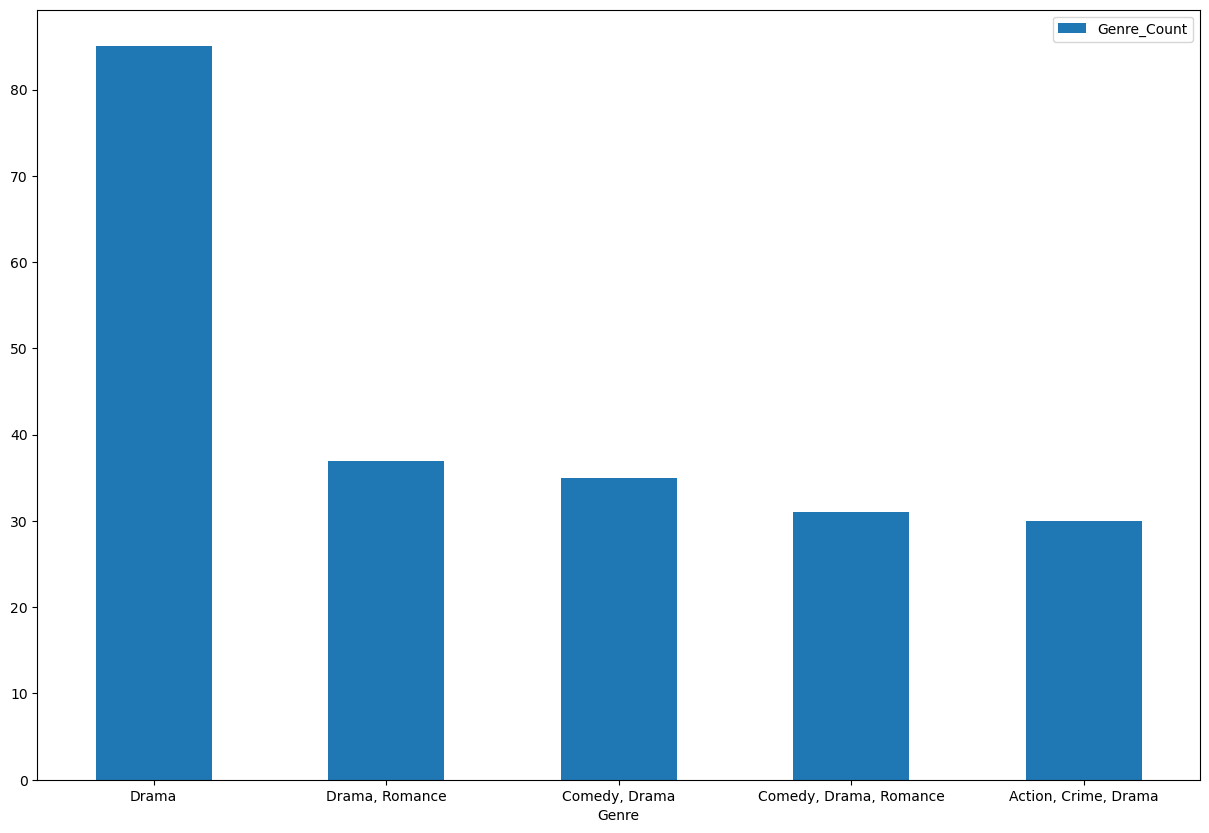

In [64]:
MoviesTVshows_Genre_df.head(5).plot.bar(x='Genre', y='Genre_Count', rot=0, figsize=(15, 10))

Identify the director with the most top-rated movies/TV shows by creating a new dataframe containing the count of movies/TV shows directed by each director using pandas.
Visualize the data using a bar chart to show the director with the most top-rated movies/TV shows using pandas and matplotlib.

In [65]:
MoviesTVshows_director_df= MoviesTVshows_df.groupby('Director').count().sort_values('Genre',ascending=False).head(10)
MoviesTVshows_director_df = MoviesTVshows_director_df[['Genre']]
MoviesTVshows_director_df.reset_index(inplace=True)
MoviesTVshows_director_df

Director  Genre
0   Alfred Hitchcock     14
1   Steven Spielberg     13
2     Hayao Miyazaki     11
3    Martin Scorsese     10
4     Akira Kurosawa     10
5    Stanley Kubrick      9
6        Woody Allen      9
7       Billy Wilder      9
8  Quentin Tarantino      8
9  Christopher Nolan      8

In [66]:
MoviesTVshows_director_ratedf=MoviesTVshows_df.groupby('Director').mean().sort_values('IMDB_Rating',ascending=False)
MoviesTVshows_director_ratedf = MoviesTVshows_director_ratedf[['IMDB_Rating']].round(2)
MoviesTVshows_director_ratedf.reset_index(inplace=True)
MoviesTVshows_director_ratedf

Director  IMDB_Rating
0     Frank Darabont         8.95
1     Irvin Kershner         8.70
2     Lana Wachowski         8.70
3       George Lucas         8.60
4    Roberto Benigni         8.60
..               ...          ...
543       Eric Bress         7.60
544        Ted Demme         7.60
545      Neil Burger         7.60
546   Bennett Miller         7.60
547      Mary Harron         7.60

[548 rows x 2 columns]

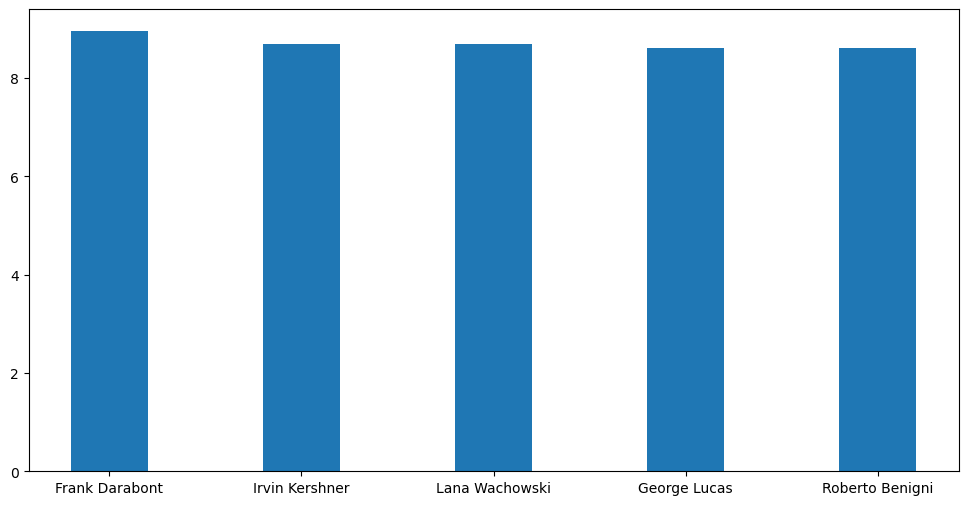

In [67]:
Director = MoviesTVshows_director_ratedf['Director'].head(5)
IMDB_Rating = MoviesTVshows_director_ratedf['IMDB_Rating'].head(5)
 
# Figure Size
fig = plt.figure(figsize =(12, 6))
 
# Horizontal Bar Plot
plt.bar(Director, IMDB_Rating,width = 0.4)
 
# Show Plot
plt.show()

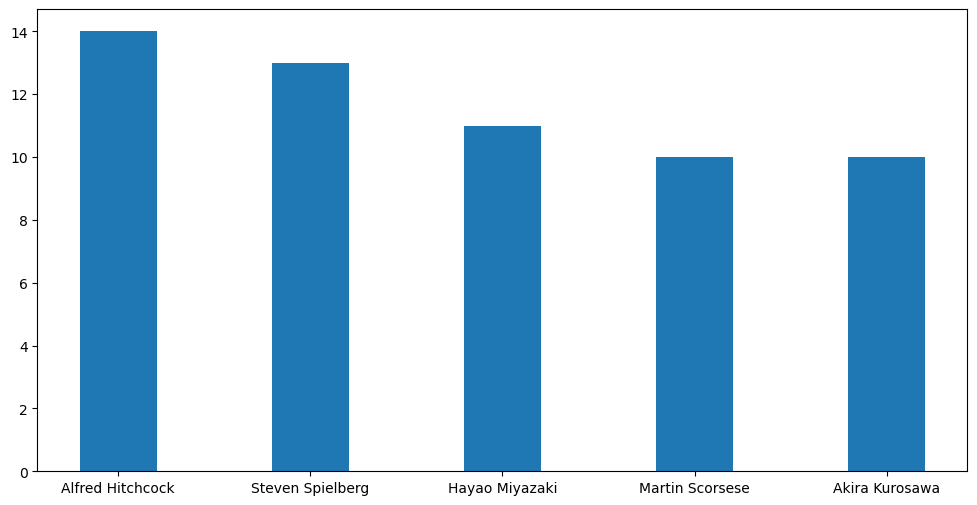

In [68]:
Director = MoviesTVshows_director_df['Director'].head(5)
count = MoviesTVshows_director_df['Genre'].head(5)
 
# Figure Size
fig = plt.figure(figsize =(12, 6))
 
# Horizontal Bar Plot
plt.bar(Director, count,width = 0.4)
 
# Show Plot
plt.show()

Write a report summarizing your analysis and findings, including any insights or observations you discovered, using markdown cells in the Jupyter notebook.

Below Points Summarize the the analysis results and findings :

A- Drama is the most popular genre of movies and TV shows, it have 85 movies/TV shows.

B-Frank Darabont is the most director have the top-rated movies/TV shows

C-Alfred Hitchcock is the most director directed the movies/TV shows.